In [1]:
import numpy as np                           
import pandas as pd                          
import matplotlib.pyplot as plt              
import seaborn as sns    

## DATASET OVERVIEW OR UNDERSTANDING THE DATA

In [3]:
#reading the comma separated values (dataset)

df=pd.read_csv('insurance.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## DATA PREPROCESSING 

In [7]:
#Extracting x and y values
x=df.iloc[:,:-1].values           
y=df.iloc[:,-1].values     
print(x)
print(y)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [8]:
#Checking for missing values and imputing them if required
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#From df.info(), we have three columns with categorical values: region,smoker and sex which needs to be converted
#encoding categorical values for sex,smoker and region columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

g = df.drop(['charges'], axis=1)
categorical_cols = ['sex', 'smoker'] 
categor=['region']
v = pd.get_dummies(g, columns = categorical_cols, drop_first=True)
x=pd.get_dummies(v,columns=categor)

print(x)     
   #can be done using OneHotEncoder as well
   #x = pd.get_dummies(g, columns=['sex', 'smoker','region'], drop_first=True)  
   #ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,4,5])],remainder='passthrough')
   #x = np.array(ct.fit_transform(x))
   #print(x)
print('--------------------------------------------------------------')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
print(y)

      age     bmi  children  sex_male  smoker_yes  region_northeast  \
0      19  27.900         0         0           1                 0   
1      18  33.770         1         1           0                 0   
2      28  33.000         3         1           0                 0   
3      33  22.705         0         1           0                 0   
4      32  28.880         0         1           0                 0   
...   ...     ...       ...       ...         ...               ...   
1333   50  30.970         3         1           0                 0   
1334   18  31.920         0         0           0                 1   
1335   18  36.850         0         0           0                 0   
1336   21  25.800         0         0           0                 0   
1337   61  29.070         0         0           1                 0   

      region_northwest  region_southeast  region_southwest  
0                    0                 0                 1  
1                    0   

In [10]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
np.set_printoptions(suppress=True)
print(x)

[[-1.43876426 -0.45332    -0.90861367 ... -0.56641788 -0.61132367
   1.76548098]
 [-1.50996545  0.5096211  -0.07876719 ... -0.56641788  1.63579466
  -0.56641788]
 [-0.79795355  0.38330685  1.58092576 ... -0.56641788  1.63579466
  -0.56641788]
 ...
 [-1.50996545  1.0148781  -0.90861367 ... -0.56641788  1.63579466
  -0.56641788]
 [-1.29636188 -0.79781341 -0.90861367 ... -0.56641788 -0.61132367
   1.76548098]
 [ 1.55168573 -0.26138796 -0.90861367 ...  1.76548098 -0.61132367
  -0.56641788]]


In [11]:
#splitting the data into training and test set

from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.15,random_state=0)
print(x_tr)
print('---------------------------')
print(x_te)

[[ 1.7652893   0.52766599 -0.90861367 ... -0.56641788  1.63579466
  -0.56641788]
 [ 1.12447859  0.34639684  0.75107928 ...  1.76548098 -0.61132367
  -0.56641788]
 [-0.58434998 -0.78140896  1.58092576 ... -0.56641788 -0.61132367
   1.76548098]
 ...
 [ 0.05646073 -0.91592544 -0.90861367 ... -0.56641788  1.63579466
  -0.56641788]
 [-1.43876426  0.79833938 -0.90861367 ...  1.76548098 -0.61132367
  -0.56641788]
 [-0.4419476  -1.99533811 -0.07876719 ... -0.56641788 -0.61132367
   1.76548098]]
---------------------------
[[ 0.91087502 -0.0760177  -0.07876719 ... -0.56641788 -0.61132367
   1.76548098]
 [ 0.55486907 -0.21217462 -0.07876719 ... -0.56641788  1.63579466
  -0.56641788]
 [ 0.62607026  1.62430334  0.75107928 ...  1.76548098 -0.61132367
  -0.56641788]
 ...
 [-0.72675236  1.08705767  0.75107928 ... -0.56641788  1.63579466
  -0.56641788]
 [-0.58434998 -0.33930909 -0.07876719 ...  1.76548098 -0.61132367
  -0.56641788]
 [ 1.0532774   0.26847571 -0.07876719 ... -0.56641788 -0.61132367
  -0

# EDA

Data distribution analysys


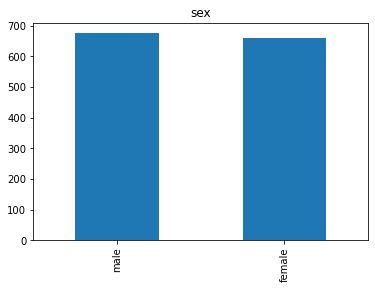

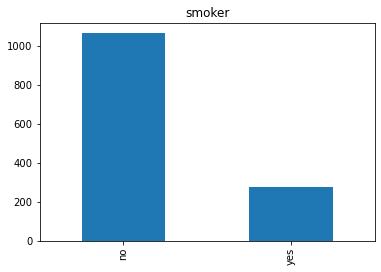

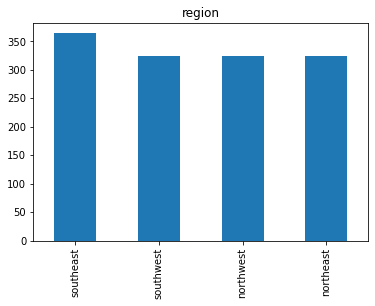

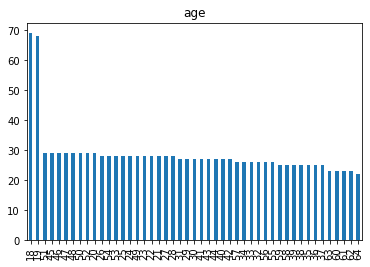

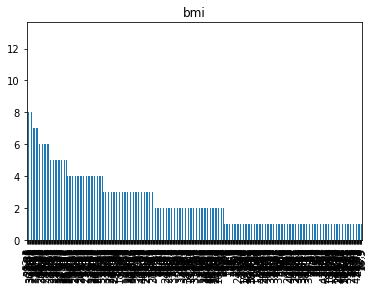

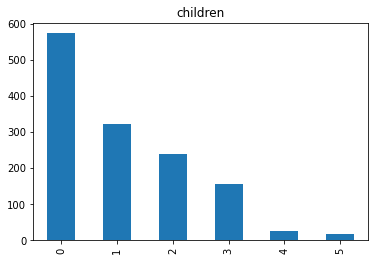

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

variables = ['sex','smoker','region','age','bmi','children']

# data distribution analysys
print('Data distribution analysys')
for v in variables:
    df = df.sort_values(by=[v])
    df[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

Mean cost analysys:


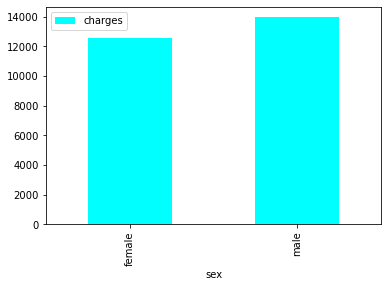

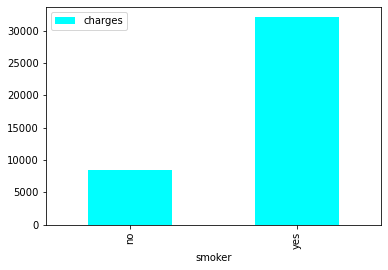

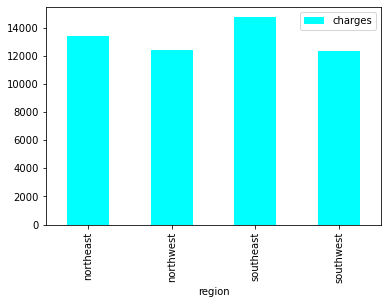

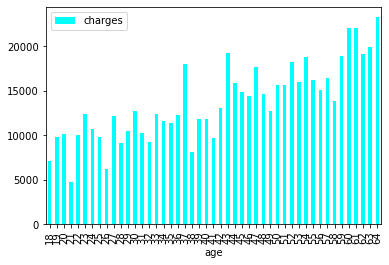

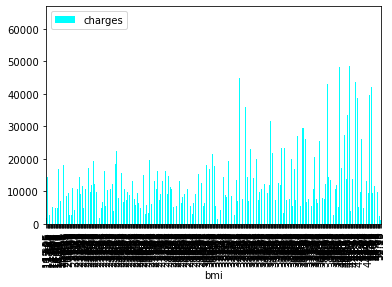

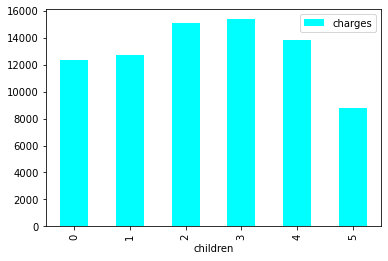

In [18]:
print('Mean cost analysys:')
for v in variables:
    group_df = df.groupby(pd.Grouper(key=v)).mean()
    group_df = group_df.sort_index()
    group_df.plot(y = ['charges'],kind = 'bar',color='cyan')
    plt.show()


<AxesSubplot:xlabel='age', ylabel='charges'>

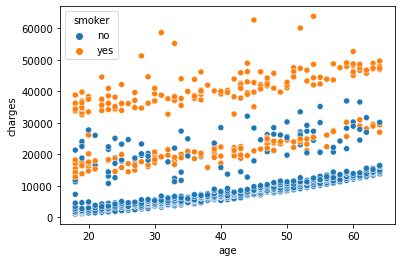

In [19]:
sns.scatterplot(x='age', y='charges',data=df,hue='smoker')

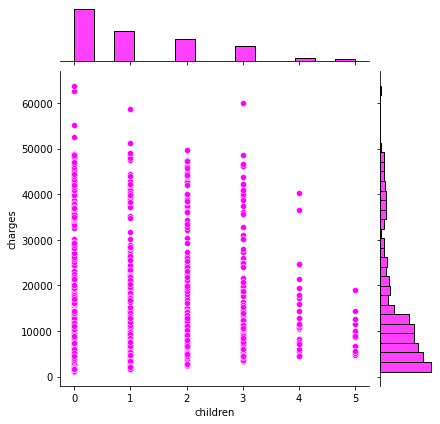

In [20]:
sns.jointplot(x='children',y='charges',data=df,color='magenta')

In [21]:
print("Maximum charge ",df.groupby('smoker').max()['charges'])
print()
print("Mean charge    ",df.groupby('smoker').mean()['charges'])

Maximum charge  smoker
no     36910.60803
yes    63770.42801
Name: charges, dtype: float64

Mean charge     smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


<AxesSubplot:xlabel='smoker', ylabel='count'>

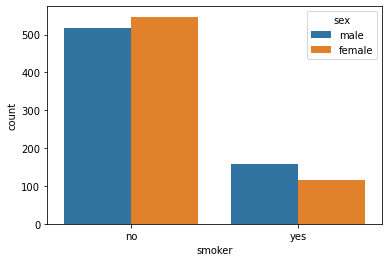

In [22]:
sns.countplot(x='smoker',data=df,hue='sex')

<AxesSubplot:>

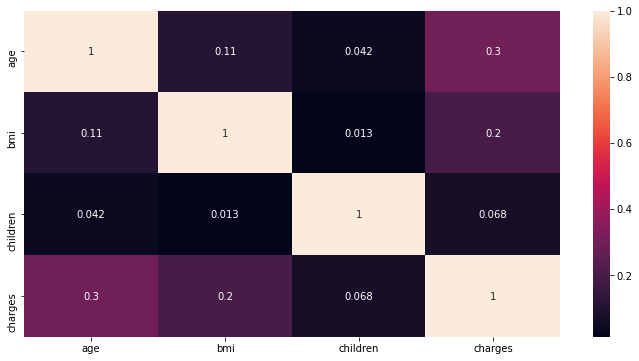

In [23]:
fig=plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)     #df.corr() is the correlation function

## TRAINING THE LINEAR REGRESSION MODEL

In [24]:
#training the Linear Regression model

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_tr,y_tr)

LinearRegression()

## BUILDING PREDICTION MODEL (TRAINING)

In [25]:
from sklearn import linear_model

lr_model = linear_model.LinearRegression()
lr_model.fit(x_tr,y_tr)
lr_predict = lr_model.predict(x_te)
sample_id = 3
print('Actual Charges : %.2f' % y_te[sample_id])
print('Linear Regression Prediction : %.2f' % lr_predict[sample_id])

Actual Charges : 897.00
Linear Regression Prediction : 851.46


## MODEL EVALUATION (TESTING)

In [26]:
#predicting the output and checking errors

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
import math
y_pred=lr.predict(x_te)


mse=mean_squared_error(y_te,y_pred)
print('Mean Squared Error-Linear Regression : %.2f ' % mse)
print('Mean Squared Error-Linear Regression (square rooted): %.2f ' % np.sqrt(mse))

print()
print('Mean Absolute Error: %.2f ' % mean_absolute_error(y_te,y_pred))
print()
print('R2 score-Linear Regression : %.2f' % r2_score(y_te,y_pred))

Mean Squared Error-Linear Regression : 33649.64 
Mean Squared Error-Linear Regression (square rooted): 183.44 

Mean Absolute Error: 130.86 

R2 score-Linear Regression : 0.78


## TRAINING THE MLR MODEL

In [28]:
#splitting into x and y

df_m=pd.read_csv('insurance.csv')
x_m=df_m.iloc[:,:-1].values
y_m=df_m.iloc[:,-1].values
print(x_m)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]


In [29]:
#encoding categorical columns

g_m=df_m.drop(['charges'], axis=1)
categorical_cols = ['sex', 'smoker'] 
categor=['region']
v_m = pd.get_dummies(g_m, columns = categorical_cols, drop_first=True)
x_m=pd.get_dummies(v_m,columns=categor)
print(x_m)    

      age     bmi  children  sex_male  smoker_yes  region_northeast  \
0      19  27.900         0         0           1                 0   
1      18  33.770         1         1           0                 0   
2      28  33.000         3         1           0                 0   
3      33  22.705         0         1           0                 0   
4      32  28.880         0         1           0                 0   
...   ...     ...       ...       ...         ...               ...   
1333   50  30.970         3         1           0                 0   
1334   18  31.920         0         0           0                 1   
1335   18  36.850         0         0           0                 0   
1336   21  25.800         0         0           0                 0   
1337   61  29.070         0         0           1                 0   

      region_northwest  region_southeast  region_southwest  
0                    0                 0                 1  
1                    0   

In [30]:
#splitting into training and test set using different variables
xm_tr,xm_te,ym_tr,ym_te=train_test_split(x_m,y_m,test_size=0.25,random_state=0)
print(xm_tr)
print('---------------------------')
print(xm_te)

      age    bmi  children  sex_male  smoker_yes  region_northeast  \
1075   32  29.59         1         0           0                 0   
131    61  22.04         0         0           0                 1   
15     19  24.60         1         1           0                 0   
1223   20  24.42         0         0           1                 0   
1137   26  22.23         0         0           0                 0   
...   ...    ...       ...       ...         ...               ...   
763    27  26.03         0         1           0                 1   
835    42  35.97         2         1           0                 0   
1216   40  25.08         0         1           0                 0   
559    19  35.53         0         1           0                 0   
684    33  18.50         1         0           0                 0   

      region_northwest  region_southeast  region_southwest  
1075                 0                 1                 0  
131                  0               

In [31]:
#feature scalling

sc=StandardScaler()
x_m=sc.fit_transform(x_m)
np.set_printoptions(suppress=True)
print(x_m)

[[-1.43876426 -0.45332    -0.90861367 ... -0.56641788 -0.61132367
   1.76548098]
 [-1.50996545  0.5096211  -0.07876719 ... -0.56641788  1.63579466
  -0.56641788]
 [-0.79795355  0.38330685  1.58092576 ... -0.56641788  1.63579466
  -0.56641788]
 ...
 [-1.50996545  1.0148781  -0.90861367 ... -0.56641788  1.63579466
  -0.56641788]
 [-1.29636188 -0.79781341 -0.90861367 ... -0.56641788 -0.61132367
   1.76548098]
 [ 1.55168573 -0.26138796 -0.90861367 ...  1.76548098 -0.61132367
  -0.56641788]]


In [32]:
#training the MLR Model
mlr=LinearRegression()
mlr.fit(xm_tr,ym_tr)

LinearRegression()

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_tr,y_tr)

rf_predict = rf_model.predict(x_te)
rf_mse = mean_squared_error(y_te,rf_predict)
print('Mean Squared Error-Random Forest (square-rooted): %.2f ' % math.sqrt(rf_mse))
print()
rf_r2 = r2_score(y_te, rf_predict)
print('R2 score-Random Forest : %.2f' % rf_r2)
print()
rfr = RandomForestRegressor(n_estimators=7,random_state=0)
rfr.fit(x_tr,y_tr)
sample_id=3
y_predict = rfr.predict(x_te)
print('Actual Charges : %.2f' % y_te[sample_id])
print('Random Forest Prediction : %.2f'  % y_predict[sample_id])

Mean Squared Error-Random Forest (square-rooted): 163.99 

R2 score-Random Forest : 0.83

Actual Charges : 897.00
Random Forest Prediction : 891.57


## PLOT BETWEEN Y TEST AND Y PREDICTED
### True value vs Predicted value for MLR

Text(0, 0.5, 'Predicted Y')

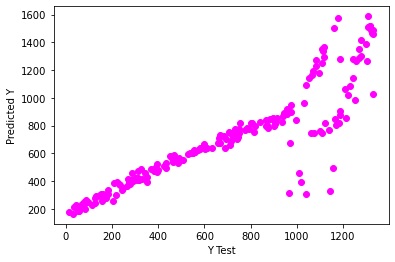

In [34]:
plt.scatter(y_te,lr_predict,color='magenta')          
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### True value vs Predicted value for RF

Text(0, 0.5, 'Predicted Y')

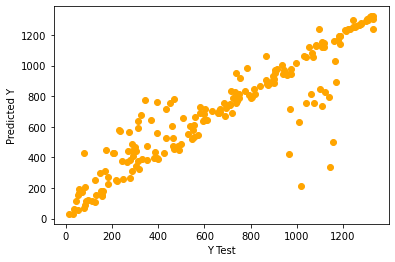

In [35]:
plt.scatter(y_te,rf_predict,color='orange')           
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Thus we can see that RF is more accurate than MLR